In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from config import config

In [3]:
from utils import visualize_X_samples_grid

import os
import numpy as np
import pandas as pd

# Check Data Module

In [4]:
from dataset import SpriteDataModule
dm = SpriteDataModule()
dm.setup(stage='fit')
dl = dm.train_dataloader()

INFO     | setup | Loading Sprites
INFO     | setup | Loading Sprite Labels
INFO     | setup | Train Dataset       : 800 samples
INFO     | setup | Validation Dataset  : 200 samples


In [5]:
batch = next(iter(dl))
images, labels = batch
images.shape, labels.shape

(torch.Size([4, 3, 16, 16]), torch.Size([4]))

In [6]:
print(images.min(), images.max())
print(labels.min(), labels.max())

images_0_255 = images * 255.
print(images_0_255.min(), images_0_255.max())

tensor(0.) tensor(1.)
tensor(1, dtype=torch.int32) tensor(3, dtype=torch.int32)
tensor(0.) tensor(255.)


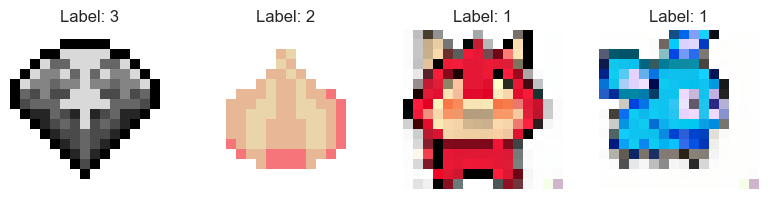

In [7]:
visualize_X_samples_grid(images, labels, n_samples=4, n_cols=4)

# Model

In [8]:
from light import SpriteLightning
light = SpriteLightning()

INFO     | __init__ | Number of Trainable Parameters : 17219203


In [9]:
noise_pred = light.checkout(batch)
noise_pred.shape

torch.Size([4, 3, 16, 16])

# Generate

In [10]:
samples, labels = light.generate()
samples.shape, labels.shape

INFO     | generate | Generating Sample Images
DEBUG    | generate | Timestep 0
DEBUG    | generate | Timestep 50
DEBUG    | generate | Timestep 100
DEBUG    | generate | Timestep 150
DEBUG    | generate | Timestep 200
DEBUG    | generate | Timestep 250
DEBUG    | generate | Timestep 300
DEBUG    | generate | Timestep 350
DEBUG    | generate | Timestep 400
DEBUG    | generate | Timestep 450


(torch.Size([4, 3, 16, 16]), torch.Size([4]))

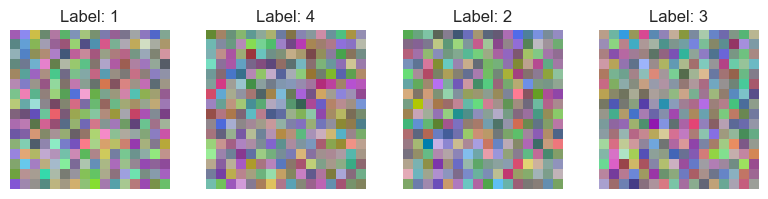

In [11]:
visualize_X_samples_grid(samples, labels, n_samples=config.train.batch_size, n_cols=4)

# Test Images

(4, 3, 16, 16) (4,)


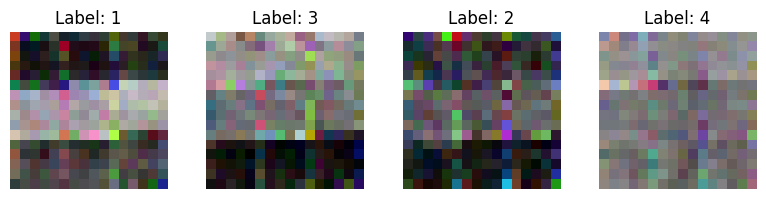

In [22]:
images = np.load('./output/test_images/samples.npy')
labels = np.load('./output/test_images/labels.npy')
print(images.shape, labels.shape)

visualize_X_samples_grid(images, labels, n_samples=4, n_cols=4)